In [2]:
import numpy as np
import control as ctrl
import matplotlib.pyplot as plt
from laguerre_networks import *

## Visualization of CT Laguerre Polynomials

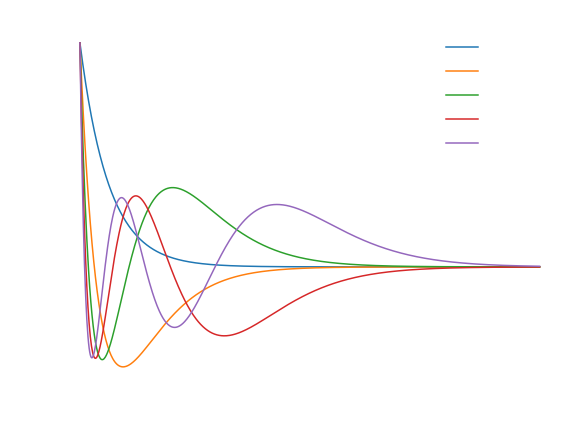

In [3]:
from scipy.linalg import expm

A, L0 = laguerre_network_ct(2, 5)
N = A.shape[0]

t = np.arange(0, 8, 0.01)

L = np.zeros(shape = (A.shape[0], t.shape[0]))
L[:,0] = np.reshape(L0, (L0.shape[0],))

# Evaluating Laguerre polynomials up to order N
for t_k in range(t.shape[0]):
    L[:,t_k] = np.matmul(expm(A*t[t_k]), L[:,0])

# Plotting Laguerre Polynomials
font_plot = "Times"
fig, axes = plt.subplots(figsize = (8,6))

for p in range(L.shape[0]):
    axes.plot(t, L[p,:], label = f"Degree {p}")

axes.set_xlabel("Time (s)", fontname = font_plot, color = "white", fontsize = 15)
axes.set_ylabel("Amplitude", fontname = font_plot, color = "white", fontsize = 15)
axes.set_title("CT Laguerre Polynomials", fontname = font_plot, fontsize = 20, color = "white")

axes.tick_params(color = "white", labelcolor = "white")
if N < 10: axes.legend(prop = {'size' : 16, 'family' : font_plot}, frameon = False)
plt.tight_layout()

for tick in axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
    tick.label.set_fontname(font_plot)

for tick in axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
    tick.label.set_fontname(font_plot)
    
leg = axes.get_legend()
for text in leg.get_texts():
    text.set_color("white")
    
axes.spines['bottom'].set_color('white')
axes.spines['top'].set_color('white') 
axes.spines['right'].set_color('white')
axes.spines['left'].set_color('white')    

fig.savefig("Fig_CT_Laguerre_Polynomials.png", dpi = 300, transparent = True)

## Approximating Dynamics using Laguerre Networks

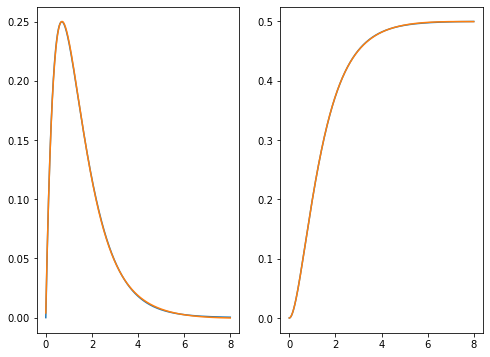

In [3]:
# Creating a Laguerre network
A, L0 = laguerre_network_ct(1, 5)

# Transfer function of an arbitrary system
H_tf = ctrl.tf(np.array([1]), np.convolve(np.array([1, 1]), np.array([1, 2])))

# Computing impulse response of the system
t = np.arange(0, 8, 0.01)
_, h = ctrl.impulse_response(H_tf, t)

# Calculating Laguerre coordinates
c, L = laguerre_coordinates_ct(A, L0, t, h)

# Using Laguerre coordinates to compute approximated impulse response
h_model = np.matmul(c.T, L)

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 6))
axes[0].plot(t, h)
axes[0].plot(t, h_model)

# Computing a state-space realization using the Laguerre model
ss_laguerre = ctrl.StateSpace(A, L0, c, 0)

# Validating against the step response of the system
_, s_system = ctrl.step_response(H_tf, t)
_, s_laguerre = ctrl.step_response(ss_laguerre, t)

axes[1].plot(t, s_system);
axes[1].plot(t, s_laguerre);

## Approximating Delays using Laguerre Networks

In [4]:
# Calculating Laguerre coordinates
c, L = laguerre_coordinates_ct(A, L0, t, h)

In [5]:
A, B, C, D = legendre_pade(28**2, 256)
ss_legendre = ctrl.StateSpace(A, B, C, D)

t = np.arange(0, 1500, 0.1)
_, h_legendre = ctrl.impulse_response(ss_legendre, t)
_, s_legendre = ctrl.step_response(ss_legendre, t)

In [6]:
A, L0 = laguerre_network_ct(10, 50)
# Calculating Laguerre coordinates
c, L = laguerre_coordinates_ct(A, L0, t, h_legendre)

In [7]:
c

array([-0.07947749, -0.06677204, -0.06666633, -0.07115181, -0.07484526,
       -0.07570898, -0.07504001, -0.07630874, -0.08158327, -0.08626769,
       -0.07939683, -0.05761602, -0.04056743, -0.05444405, -0.08792227,
       -0.09481868, -0.0685279 , -0.06215703, -0.08833814, -0.08800835,
       -0.05747663, -0.06298721, -0.08795636, -0.07057393, -0.05796231,
       -0.08716149, -0.08581755, -0.06254418, -0.08335602, -0.08843751,
       -0.05922578, -0.07245588, -0.08040224, -0.05157787, -0.06541007,
       -0.07658787, -0.05214941, -0.07141515, -0.08184002, -0.06023946,
       -0.08314973, -0.08519492, -0.06475653, -0.08825059, -0.07800341,
       -0.06313465, -0.08614048, -0.06641178, -0.0649507 , -0.08458835])

In [ ]:
ss_laguerre = ctrl.StateSpace(A, L0, c, 0)

_, s_laguerre = ctrl.step_response(ss_laguerre, t)

plt.plot(t, s_legendre, label = "Legendre")
plt.plot(t, s_laguerre, label = "Laguerre")

## Evaluating Numerical Condition

In [ ]:
cond_n

In [ ]:
p = np.arange(0.5, 10, 0.5)
N = np.arange(10, 260, 30)

fig, axes = plt.subplots(figsize = (12, 6))

for N_v in N: 
    cond_n = np.zeros_like(p, dtype = np.float64)
    for n, p_v in enumerate(p):
        A, L0 = laguerre_network_ct(p = p_v, N = N_v)
        print(A)
        cond_n[n] = np.linalg.cond(A)
        print(cond_n[n])
        break
    break
        
    axes.plot(p, cond_n, label = f"N = {N_v}")

axes.plot(a, np.ones_like(a), linestyle = "--", color = "red")
axes.set_ylim([0.8, 2])
#axes.legend(prop = {"family" : "Times", "size" : 12})
axes.set_xlabel("$a$", fontname = "Times", fontsize = 14)
axes.set_ylabel("Condition number of $\mathbf{A}_{\ell}$", fontname = "Times", fontsize = 14)
axes.set_title("Numerical Condition of $\mathbf{A}_{\ell}$", fontname = "Times", fontsize = 16)

plt.tight_layout()

In [ ]:
plt.plot(t, h_legendre, label = "Legendre")
plt.plot(t, h_laguerre, label = "Laguerre")

In [ ]:
# Computing the Pade approximant for Td = 0.5, 3rd order polynomial on the denominator and 2nd order in the numerator
num, den = ctrl.pade(28**2, 256, numdeg = 255)
num = np.asarray(num, np.float64())
den = np.asarray(num, np.float64())

G_tf_ct = ctrl.tf(num, den)

t = np.arange(0, 2*(28**2), 0.01)
s_ideal = (t>=28**2)

_, s = ctrl.step_response(G_tf_ct, t)

plt.plot(t, s)
plt.plot(t, s_ideal, label = "Ideal", linestyle = "--")

In [ ]:
u = 0.1*np.sin(2*np.pi*(1/200)*t) * (t<=784) + 1*(t>=784)
_, y, _ = ctrl.forced_response(G_tf_ct, t, u)
plt.plot(t, u, label = "Input")
plt.plot(t, y, label = "Output")